In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [13]:
X = np.random.randn(10000,2)

In [19]:
k = 5
mdl = KMeans(n_clusters=k)
mdl.fit(X)
k_assignments = mdl.labels_
k_labels = np.unique(k_assignments)

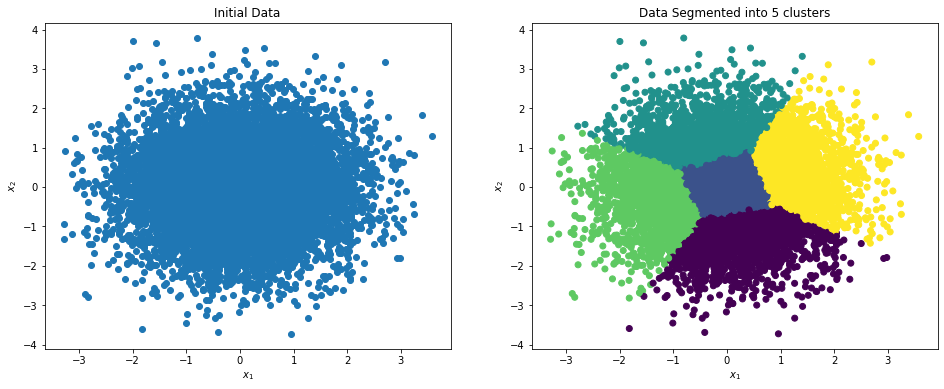

In [26]:
plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.scatter(X[:,0], X[:,1])
plt.title('Initial Data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.subplot(122)
plt.scatter(X[:,0], X[:,1], c=k_assignments)
plt.title(F'Data Segmented into {k} clusters')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

### want to remove section of the data to be final held out test set

In [27]:
k_test, k_train = k_labels[:1], k_labels[1:]
X_test, X_train = X[k_assignments == k_test], X[k_assignments != k_test]


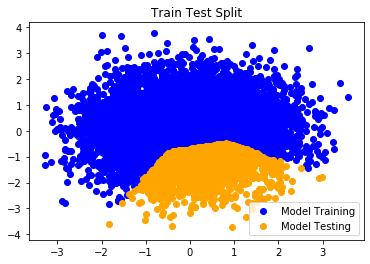

In [33]:
plt.scatter(X_train[:,0], X_train[:,1], c='blue', label='Model Training')
plt.scatter(X_test[:,0], X_test[:,1], c='orange', label='Model Testing')
plt.title('Train Test Split')
plt.legend()
plt.show()


### Cycle through all iterations

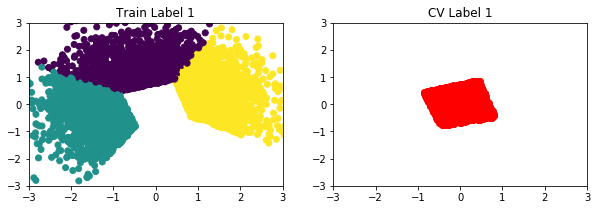

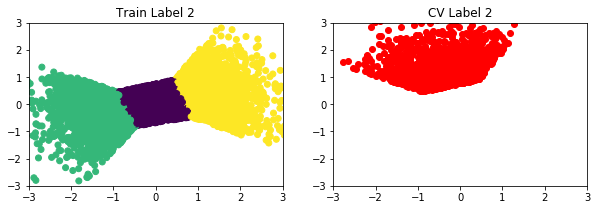

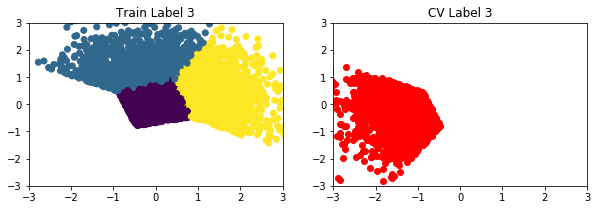

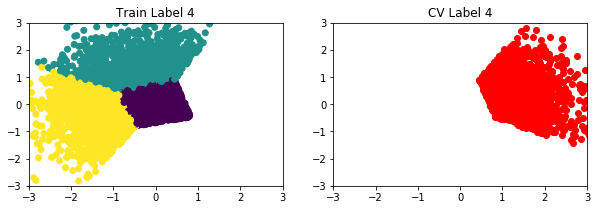

In [35]:
train_assignments = k_assignments[k_assignments != k_test]

plt.figure(figsize=(9, 9))
for i, label in enumerate(k_train):
    train = X_train[train_assignments != label]
    cv = X_train[train_assignments == label]
    
    plt.subplot(2, 2, i+1)
    plt.title(F'Train Label {label}')
    plt.scatter(train[:,0], train[:,1], label='Train')
    plt.scatter(cv[:,0], cv[:,1], c='red', marker='d', label='Cross Validation')
    plt.scatter(X_test[:,0], X_test[:,1], c='orange', marker='x', label='Test')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.legend()

plt.subplots_adjust(hspace=0.3)
plt.show()